# Okavango GCM Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import glob
import itertools
from matplotlib.patches import Rectangle
import matplotlib.transforms as transforms
# from matplotlib.dates import date2num
# import matplotlib.dates as mdates
# from hydroeval import evaluator, nse, rmse, pbias

In [2]:
from swatmf_pkgs import gcm_analysis

# Set Path

In [3]:
working_path = "D:\\Projects\\Watersheds\\Okavango\\scenarios\\okvg_swatmf_scn_climates\\weather_inputs"
base = "D:\\Projects\\Watersheds\\Okavango\\scenarios\\okvg_swatmf_scn_climates\\models\\base\\pcp1.pcp"

# Rainfall Data

In [4]:
wt_fds, full_paths = gcm_analysis.get_weather_folder_lists(working_path)


In [5]:
base_df = gcm_analysis.read_pcp(base, 257)

100%|██████████| 257/257 [00:03<00:00, 70.65it/s]


In [7]:
base_dfm = base_df.mean(axis=1)
base_dfm.name ='base'
base_dfm

1960-01-01    0.232296
1960-01-02    0.030739
1960-01-03    0.080545
1960-01-04    4.082879
1960-01-05    9.100389
                ...   
2019-12-27    7.906615
2019-12-28    7.579767
2019-12-29    5.707004
2019-12-30    5.128794
2019-12-31    5.223346
Name: base, Length: 21915, dtype: float64

In [8]:
base_dfm = base_dfm['1/1/1980':'12/31/2019']
as_base =  base_dfm.resample('A').sum()
ms_base = base_dfm.resample('M').sum()

In [255]:
as_base.name ='base'
ms_base.name ='base'

In [9]:
dff = pd.DataFrame()
for i, name in zip(full_paths, wt_fds):
    df = gcm_analysis.read_pcp(os.path.join(i, 'pcp1.pcp'), 257)
    df = df.mean(axis=1)
    df.name = name
    dff = pd.concat([dff, df], axis=1)



100%|██████████| 257/257 [00:07<00:00, 34.31it/s]


In [10]:
dff

,ssp245-inm-cm5-0,ssp245-miroc6,ssp245-noresm2-lm,ssp245-ukesm1-0-ll,ssp585-inm-cm5-0,ssp585-miroc6,ssp585-noresm2-lm,ssp585-ukesm1-0-ll
1980-01-01,0.732685,3.476265,13.197665,1.513619,0.732685,3.476265,13.197665,1.514008
1980-01-02,1.292607,0.777043,10.115175,2.726070,1.292607,0.777043,10.115175,2.731907
1980-01-03,1.683658,3.120233,11.752918,2.218288,1.683658,3.120233,11.752918,2.218677
1980-01-04,3.301946,3.883658,5.987938,2.240078,3.301946,3.883658,5.987938,2.240078
1980-01-05,6.675875,5.517510,2.827626,6.182101,6.675875,5.517510,2.827626,6.182101
...,...,...,...,...,...,...,...,...
2099-12-27,6.773541,1.200000,7.402724,0.765370,7.563813,0.197276,0.986770,0.040856
2099-12-28,4.818677,5.715953,8.760311,0.764981,4.170428,0.510506,0.705058,0.050973
2099-12-29,9.247471,9.578599,11.570039,6.791440,4.113230,2.264981,0.223346,0.029183
2099-12-30,12.368482,9.154086,9.471595,3.140078,3.568482,0.240467,0.147860,2.036576


In [11]:
dff.index = pd.DatetimeIndex(dff.index).normalize()

In [12]:
asscn = dff.resample('A').sum()
msscn = dff.resample('M').sum()


In [13]:
asdf = pd.concat([as_base, asscn], axis=1)
asdf

,base,ssp245-inm-cm5-0,ssp245-miroc6,ssp245-noresm2-lm,ssp245-ukesm1-0-ll,ssp585-inm-cm5-0,ssp585-miroc6,ssp585-noresm2-lm,ssp585-ukesm1-0-ll
1980-12-31,597.686770,767.810117,886.250584,1154.253307,793.672763,767.822568,886.256031,1154.333852,793.670039
1981-12-31,599.377432,767.602724,647.794942,1066.924125,578.255253,767.606615,647.793774,1066.609728,578.128794
1982-12-31,866.950584,761.400778,769.044747,659.406615,737.215564,761.515564,769.039689,659.449805,737.149416
1983-12-31,720.656420,1021.252140,886.783658,628.296887,712.282490,1021.257977,886.779767,628.308171,712.285992
1984-12-31,781.801167,682.348249,675.867315,632.136187,889.912062,682.454086,675.881712,632.163035,889.923346
...,...,...,...,...,...,...,...,...,...
2095-12-31,NaN,999.558366,1038.885992,699.183658,376.142802,685.667315,946.641245,330.617510,856.455642
2096-12-31,NaN,646.735019,844.181712,907.900389,639.184047,832.950195,770.366148,489.970428,2491.283268
2097-12-31,NaN,641.250973,829.448638,714.363424,894.415175,736.933463,983.658755,666.352918,635.535798
2098-12-31,NaN,894.877043,1217.382101,618.162257,756.612451,689.802335,913.049805,837.706226,902.471206


In [14]:
msdf = pd.concat([ms_base, msscn], axis=1)
msdff = msdf.groupby(msdf.index.month).mean()
msdff

,base,ssp245-inm-cm5-0,ssp245-miroc6,ssp245-noresm2-lm,ssp245-ukesm1-0-ll,ssp585-inm-cm5-0,ssp585-miroc6,ssp585-noresm2-lm,ssp585-ukesm1-0-ll
1,170.700982,169.687163,164.338781,177.615259,166.152237,174.605272,166.183992,177.522435,168.554154
2,135.779290,169.341258,151.856274,157.672328,145.652383,178.837678,151.403923,166.301738,149.398865
3,141.100827,133.233875,139.796057,130.367046,119.914283,140.083816,140.573294,129.377435,125.299371
4,44.969591,31.066884,44.475992,47.097513,38.106618,36.052312,48.200726,45.057792,36.967302
5,0.866206,4.774932,7.388599,4.156657,4.701479,4.545499,5.741128,4.415188,6.101728
6,0.002549,0.374588,0.238998,0.940191,0.384420,1.095318,0.403570,2.082160,0.224244
7,0.011479,4.201462,1.039439,4.970720,0.527626,1.720973,0.684533,2.008820,0.055882
8,0.110409,0.594520,0.815389,3.321689,0.558129,1.549854,3.350564,2.588388,0.732490
9,4.957802,5.824533,3.061881,5.398116,5.178816,6.315195,6.099958,1.985019,5.112221
10,37.025778,36.115422,39.448846,31.795425,27.434270,37.721294,39.258405,26.785908,27.793320


# Annual Rainfall

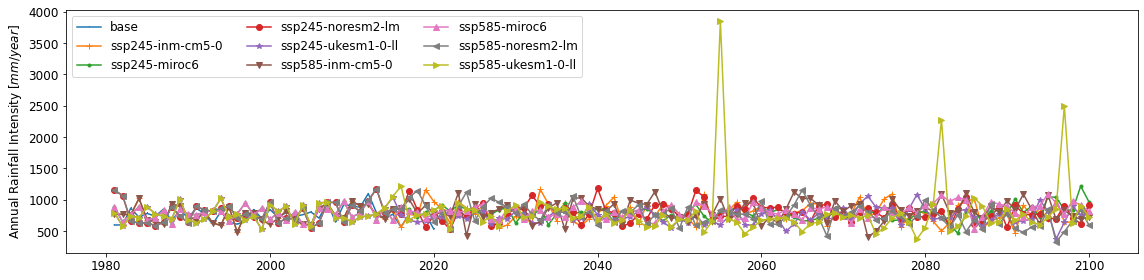

In [66]:
f, ax = plt.subplots(figsize=(16, 4))
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',))
for i in range(len(asdf.columns)):
    ax.plot(asdf.index, asdf.iloc[:, i], marker = next(marker), label=asdf.columns[i])
ax.tick_params(axis='both', labelsize=12)
ax.legend(ncol=3, fontsize=12, loc='upper left')
ax.set_ylabel('Annual Rainfall Intensity $[mm/year]$', fontsize=12)
f.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_a_01.png'), dpi=300, bbox_inches="tight")
plt.show()
# ax.plot(base_df.index, base_df, label='BASE')

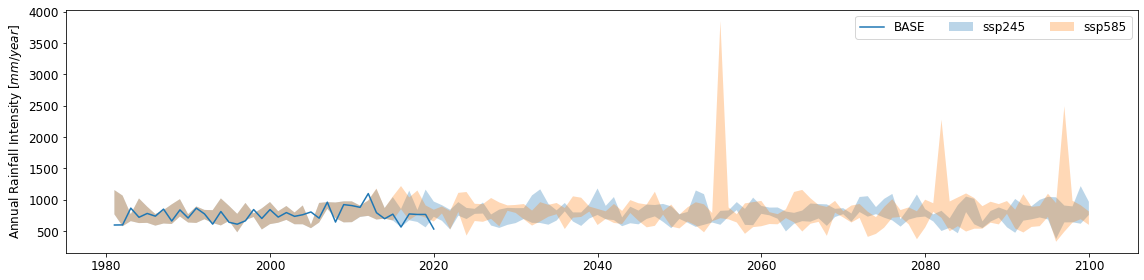

In [80]:
s245_min = asscn.iloc[:, :4].min(axis = 1)
s245_max = asscn.iloc[:, :4].max(axis = 1)
s585_min = asscn.iloc[:, 4:].min(axis = 1)
s585_max = asscn.iloc[:, 4:].max(axis = 1)

f, ax = plt.subplots(figsize=(16, 4))
ax.fill_between(asscn.index, s245_min, s245_max, alpha=0.3, label='ssp245')
ax.fill_between(asscn.index, s585_min, s585_max, alpha=0.3, label='ssp585')
ax.plot(as_base.index, as_base, label='BASE')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('Annual Rainfall Intensity $[mm/year]$', fontsize=12)
lines, labels = f.axes[0].get_legend_handles_labels()
f.tight_layout()
ax.legend(
    lines, labels, ncol=3,
    # bbox_to_anchor=(0, 0.202),
    fontsize=12,
    # loc = 'lower left'
    )
plt.savefig(os.path.join(working_path, 'okvg_gcms_a_02.png'), dpi=300, bbox_inches="tight")
plt.show()


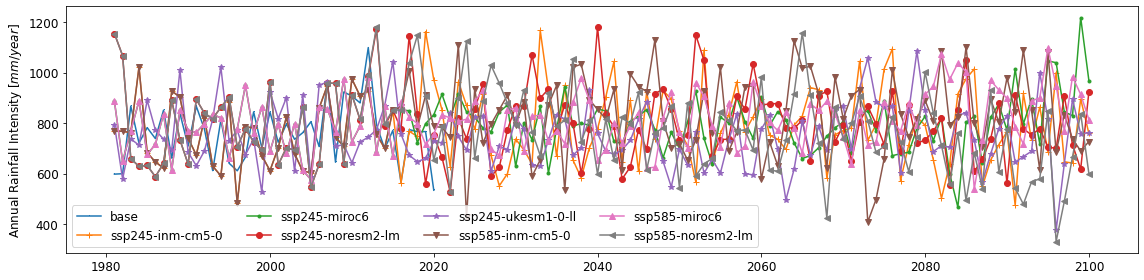

In [100]:
f, ax = plt.subplots(figsize=(16, 4))
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',))
for i in range(len(asdf.columns[:-1])):
    ax.plot(asdf.index, asdf.iloc[:, i], marker = next(marker), label=asdf.columns[i])
ax.legend(ncol=4, fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('Annual Rainfall Intensity $[mm/year]$', fontsize=12)
f.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_a_03.png'), dpi=300, bbox_inches="tight")
plt.show()

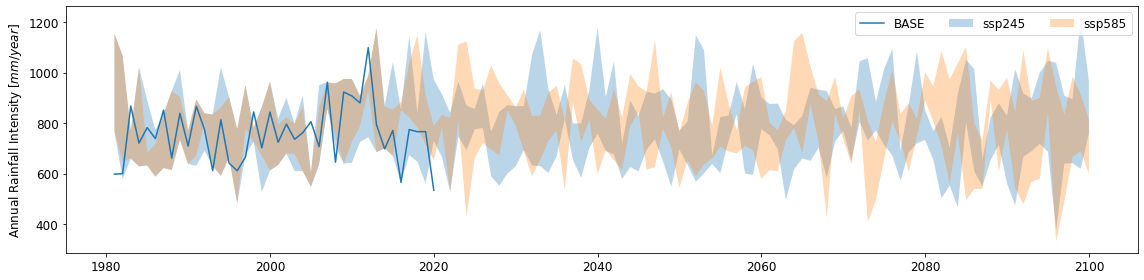

In [101]:
s245_min = asscn.iloc[:, :4].min(axis = 1)
s245_max = asscn.iloc[:, :4].max(axis = 1)
s585_min = asscn.iloc[:, 4:-1].min(axis = 1)
s585_max = asscn.iloc[:, 4:-1].max(axis = 1)

f, ax = plt.subplots(figsize=(16, 4))
ax.fill_between(asscn.index, s245_min, s245_max, alpha=0.3, label='ssp245')
ax.fill_between(asscn.index, s585_min, s585_max, alpha=0.3, label='ssp585')
ax.plot(as_base.index, as_base, label='BASE')
ax.tick_params(axis='both', labelsize=12)
lines, labels = f.axes[0].get_legend_handles_labels()
ax.set_ylabel('Annual Rainfall Intensity $[mm/year]$', fontsize=12)
ax.legend(
    lines, labels, ncol=3,
    # bbox_to_anchor=(0, 0.202),
    fontsize=12,
    # loc = 'lower left'
    )
f.tight_layout()

plt.savefig(os.path.join(working_path, 'okvg_gcms_a_04.png'), dpi=300, bbox_inches="tight")
plt.show()

# Montly Rainfall Intensity

In [82]:
s245_min = msdff.iloc[:, 1:5].min(axis = 1)
s245_max = msdff.iloc[:, 1:5].max(axis = 1)
s585_min = msdff.iloc[:, 5:].min(axis = 1)
s585_max = msdff.iloc[:, 5:].max(axis = 1)

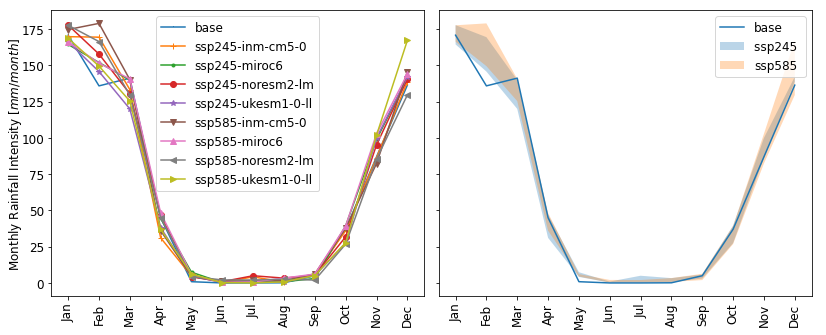

In [83]:
#%% plot month
# 
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',)) 

f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

# axes[0].plot(mon_df.index, mon_df, marker=[',', '+', '.', 'o', '*'])
for i in range(len(msdff.columns)):
    axes[0].plot(msdff.index, msdff.iloc[:, i], marker = next(marker))

# month_names = ['Jan','Feb','Mar','Apr','May','Jun',
#                'Jul','Aug','Sep','Oct','Nov','Dec']
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']

axes[1].plot(msdff.index, msdff.iloc[:, 0], label='base')
# ax.fill_between(base_dff.index, 0, base_dff.sub_137, alpha=0.3)
axes[1].fill_between(msdff.index, s245_min, s245_max, alpha=0.3, label='ssp245 ')
axes[1].fill_between(msdff.index, s585_min, s585_max, alpha=0.3, label='ssp585')
for ax in axes:
    ax.set_xticklabels(month_names, rotation=90,)
    ax.set_xticks(msdff.index[::1])
    ax.tick_params(axis='both', labelsize=12)
axes[0].legend(msdff.columns.tolist(), fontsize=12)
axes[1].legend(fontsize=12)

ax1.set_ylabel('Monthly Rainfall Intensity $[mm/month]$', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_mon_02.png'), dpi=300, bbox_inches="tight")
plt.show()


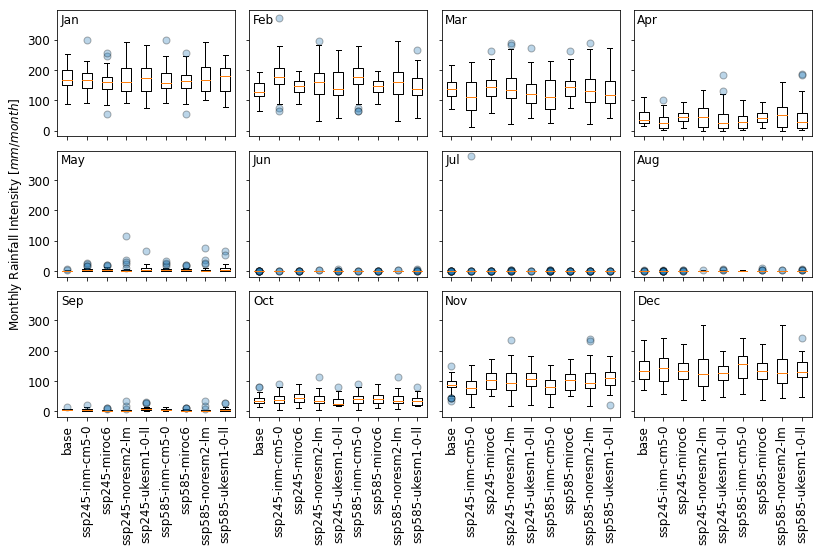

In [96]:
#%%
# Boxplot
f, axes = plt.subplots(3, 4, figsize=(12,8), sharex=True, sharey=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']


# plot. Set color of marker edge
flierprops = dict(
                marker='o', markerfacecolor='#1f77b4', markersize=7,
                # linestyle='None',
                # markeredgecolor='none',
                alpha=0.3)
for i, ax in enumerate(axes.flat):
    df_m = msdf.loc[msdf.index.month==i+1]
    df_m = df_m.dropna()
    ax.boxplot(df_m.values, flierprops=flierprops)
    ax.set_xticks([i+1 for i in range(9)])
    ax.set_xticklabels(df_m.keys(), rotation=90)
    # ax.set_xticks(df_m.columns[::1])
    ax.set_title(
        month_names[i],
        horizontalalignment='left',
        x=0.02,
        y=0.85,
    )
    ax.tick_params(axis='both', labelsize=12)
ax1.set_ylabel('Monthly Rainfall Intensity $[mm/month]$', fontsize=12, labelpad=10)
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_mon03.png'), dpi=300, bbox_inches="tight")
plt.show()


In [91]:
msdf

,base,ssp245-inm-cm5-0,ssp245-miroc6,ssp245-noresm2-lm,ssp245-ukesm1-0-ll,ssp585-inm-cm5-0,ssp585-miroc6,ssp585-noresm2-lm,ssp585-ukesm1-0-ll
1980-01-31,117.431128,153.814008,111.334630,293.529961,124.451751,153.812840,111.336965,293.530739,124.443580
1980-02-29,142.622179,164.836576,152.382490,211.886381,119.040078,164.835798,152.382879,211.884047,119.031518
1980-03-31,133.387549,206.578210,205.729961,267.914008,175.254475,206.577043,205.730350,267.912840,175.256420
1980-04-30,23.747082,44.140467,30.032685,100.666926,47.117510,44.138521,30.032296,100.673541,47.118677
1980-05-31,2.537354,4.506226,4.039689,4.143969,0.208171,4.506615,4.039689,4.154086,0.212062
...,...,...,...,...,...,...,...,...,...
2099-08-31,NaN,0.866537,0.089105,1.445525,0.132685,0.700389,1.316342,2.996887,0.080156
2099-09-30,NaN,5.706615,3.712451,0.436965,0.288327,8.073930,7.757977,2.237743,4.608949
2099-10-31,NaN,44.812451,95.442023,32.108171,15.686381,20.656809,25.029961,27.909339,17.241634
2099-11-30,NaN,56.116342,170.122957,160.185214,86.002335,62.136187,106.856809,15.560700,107.044358


# Temperature

In [21]:
dff_max = pd.DataFrame()
dff_min = pd.DataFrame()
for i, name in zip(full_paths, wt_fds):
    df_max, df_min = gcm_analysis.read_tmp(os.path.join(i, 'Tmp1.Tmp'), 154)
    df_max = df_max.mean(axis=1)
    df_min = df_min.mean(axis=1)    
    df_max.name = '{}'.format(name)
    df_min.name = '{}'.format(name)    
    dff_max = pd.concat([dff_max, df_max], axis=1)
    dff_min = pd.concat([dff_min, df_min], axis=1)


100%|██████████| 154/154 [00:08<00:00, 17.50it/s]


In [22]:
dff_max.index = pd.DatetimeIndex(dff_max.index).normalize()
dff_min.index = pd.DatetimeIndex(dff_min.index).normalize()

In [23]:
dff_mean = pd.concat([dff_max, dff_min]).groupby(level=0).mean()

In [24]:
mtmp_max = dff_max.groupby(dff_max.index.month).mean()
mtmp_min = dff_min.groupby(dff_min.index.month).mean()
mtmp_avg = dff_mean.groupby(dff_mean.index.month).mean()



In [26]:
mtmp_max

,ssp245-inm-cm5-0,ssp245-miroc6,ssp245-noresm2-lm,ssp245-ukesm1-0-ll,ssp585-inm-cm5-0,ssp585-miroc6,ssp585-noresm2-lm,ssp585-ukesm1-0-ll
1,30.386313,30.702290,30.934727,31.992203,30.764320,31.587785,31.566252,32.903875
2,30.196953,30.706507,30.641269,32.001481,30.509958,31.519755,31.209166,33.237212
3,30.504288,30.227405,30.898590,31.863423,30.888438,30.980034,31.731288,33.216543
4,30.441861,30.546205,31.276772,31.708937,30.834288,31.243723,32.049479,33.279888
5,28.927230,29.534454,29.639054,30.720002,29.142476,30.290360,30.536416,31.883716
6,26.916315,27.643973,28.162133,29.098714,27.205810,28.430056,29.093276,30.300072
7,27.600560,28.296067,28.041658,29.192932,28.156819,28.934901,29.023828,30.281141
8,31.453729,31.861139,31.733161,32.532591,32.151427,32.579804,32.268194,33.503556
9,36.404342,36.415013,35.639558,37.081762,37.061809,37.352527,36.129754,37.921952
10,36.801913,36.992574,37.560595,39.016291,37.218258,37.746684,38.304986,39.876170


In [27]:
mt245_min = mtmp_min.iloc[:, :4].min(axis = 1)
mt245_max = mtmp_max.iloc[:, :4].max(axis = 1)
mt585_min = mtmp_min.iloc[:, 4:].min(axis = 1)
mt585_max = mtmp_max.iloc[:, 4:].max(axis = 1)

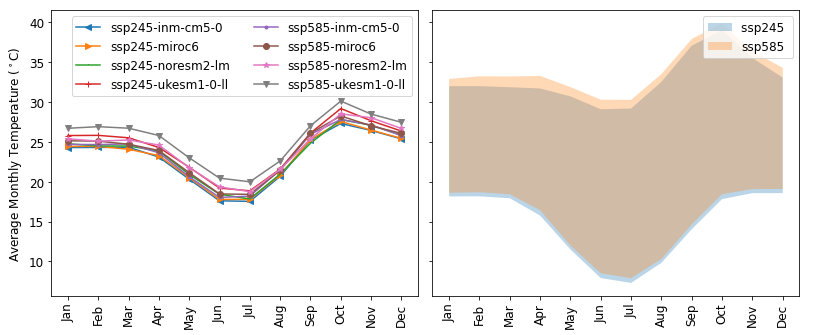

In [77]:
f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

for i in range(len(mtmp_max.columns)):
    axes[0].plot(mtmp_avg.index, mtmp_avg.iloc[:, i], marker = next(marker))
axes[1].fill_between(mtmp_max.index, mt245_min, mt245_max, alpha=0.3, label='ssp245 ')
axes[1].fill_between(mtmp_max.index, mt585_min, mt585_max, alpha=0.3, label='ssp585')

for ax in axes:
    ax.set_xticklabels(month_names, rotation=90)
    ax.set_xticks(mtmp_max.index[::1])
    ax.tick_params(axis='both', labelsize=12)
axes[0].legend(mtmp_max.columns.tolist(), ncol=2, fontsize=12)
axes[1].legend(fontsize=12)

ax1.set_ylabel('Average Monthly Temperature ($^\circ$C)', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_mon_temp_01.png'), dpi=300, bbox_inches="tight")
plt.show()

In [31]:
adf_min = dff_min.resample('A').mean()
adf_max = dff_max.resample('A').mean()
adf_mean = dff_mean.resample('A').mean()
adf_mean

,ssp245-inm-cm5-0,ssp245-miroc6,ssp245-noresm2-lm,ssp245-ukesm1-0-ll,ssp585-inm-cm5-0,ssp585-miroc6,ssp585-noresm2-lm,ssp585-ukesm1-0-ll
1980-12-31,22.145141,21.238351,21.398820,20.928191,22.145141,21.238351,21.398820,20.928191
1981-12-31,22.148459,21.160141,21.551271,22.209300,22.148459,21.160141,21.551271,22.209300
1982-12-31,21.379184,22.206126,22.050765,22.362528,21.379184,22.206126,22.050765,22.362528
1983-12-31,21.154009,21.986356,22.742641,22.540915,21.154009,21.986356,22.742641,22.540915
1984-12-31,21.712542,22.892556,21.493276,21.242904,21.712542,22.892556,21.493276,21.242904
...,...,...,...,...,...,...,...,...
2095-12-31,23.525711,23.234795,25.830238,28.991511,26.024813,27.006871,29.468814,30.680833
2096-12-31,24.483198,23.981097,24.688695,28.434428,25.680742,26.460351,28.342710,31.538681
2097-12-31,24.728181,24.028321,24.194668,26.921753,25.354937,26.192403,27.912250,32.221335
2098-12-31,23.350308,24.396236,25.649934,26.517227,27.214153,27.462861,27.859856,32.319269


In [32]:
t245_min = adf_min.iloc[:, :4].min(axis = 1)
t245_max = adf_max.iloc[:, :4].max(axis = 1)
t585_min = adf_min.iloc[:, 4:].min(axis = 1)
t585_max = adf_max.iloc[:, 4:].max(axis = 1)

In [33]:
t245_max

1980-12-31    30.445508
1981-12-31    30.631112
1982-12-31    31.089219
1983-12-31    31.386255
1984-12-31    31.722573
                ...    
2095-12-31    38.302080
2096-12-31    37.394663
2097-12-31    35.302211
2098-12-31    34.692277
2099-12-31    35.779870
Freq: A-DEC, Length: 120, dtype: float64

In [39]:
mtmp = dff_mean.loc[dff_mean.index.month==0+1]
mtmp

,ssp245-inm-cm5-0,ssp245-miroc6,ssp245-noresm2-lm,ssp245-ukesm1-0-ll,ssp585-inm-cm5-0,ssp585-miroc6,ssp585-noresm2-lm,ssp585-ukesm1-0-ll
1980-01-01,26.542857,22.887013,19.920455,23.603896,26.542857,22.887013,19.920455,23.603896
1980-01-02,26.613961,25.047403,20.334091,23.534416,26.613961,25.047403,20.334091,23.534416
1980-01-03,26.303896,25.076299,20.507468,23.600974,26.303896,25.076299,20.507468,23.600974
1980-01-04,25.650974,25.912662,19.909091,24.197727,25.650974,25.912662,19.909091,24.197727
1980-01-05,24.828571,25.140909,20.771104,24.434740,24.828571,25.140909,20.771104,24.434740
...,...,...,...,...,...,...,...,...
2099-01-27,25.133766,28.566883,25.543182,28.714610,29.471429,27.199675,23.130195,31.925325
2099-01-28,24.502273,29.539610,24.986688,27.753571,29.959740,26.781818,24.354870,30.839935
2099-01-29,23.804545,28.251623,25.907143,27.102922,27.370779,28.162662,24.266883,31.097727
2099-01-30,22.798701,25.147078,25.704870,25.565584,26.381169,28.530844,24.645455,30.983442


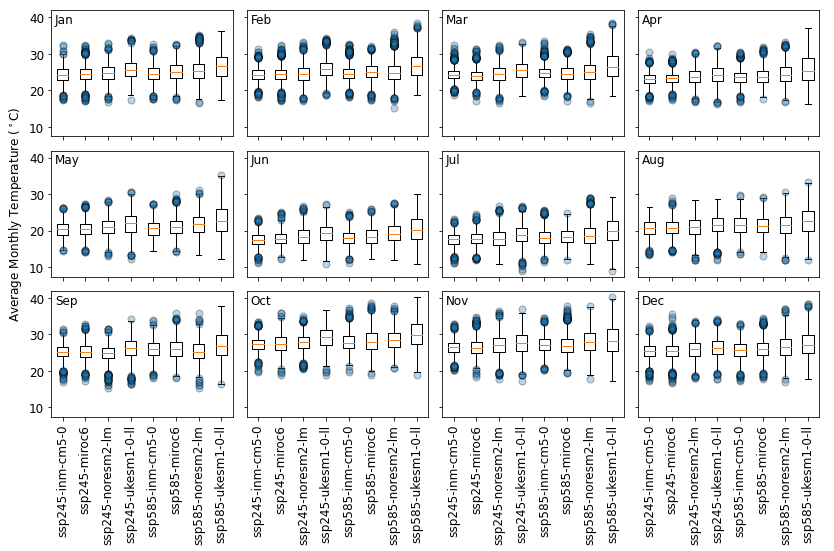

In [97]:
# Boxplot
f, axes = plt.subplots(3, 4, figsize=(12,8), sharex=True, sharey=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']


# plot. Set color of marker edge
flierprops = dict(
                marker='o', markerfacecolor='#1f77b4', markersize=7,
                # linestyle='None',
                # markeredgecolor='none',
                alpha=0.3)
for i, ax in enumerate(axes.flat):
    mtmp = dff_mean.loc[dff_mean.index.month==i+1]
    ax.boxplot(
        mtmp.values, flierprops=flierprops,
        #showfliers=False
        )
    ax.set_xticks([i+1 for i in range(8)])
    ax.set_xticklabels(mtmp.keys(), rotation=90)
    # ax.set_xticks(df_m.columns[::1])
    ax.set_title(
        month_names[i],
        horizontalalignment='left',
        x=0.02,
        y=0.85,
        )
    
    ax.tick_params(axis='both', labelsize=12)
ax1.set_ylabel('Average Monthly Temperature ($^\circ$C)', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_mon_temp.png'), dpi=300, bbox_inches="tight")
plt.show()

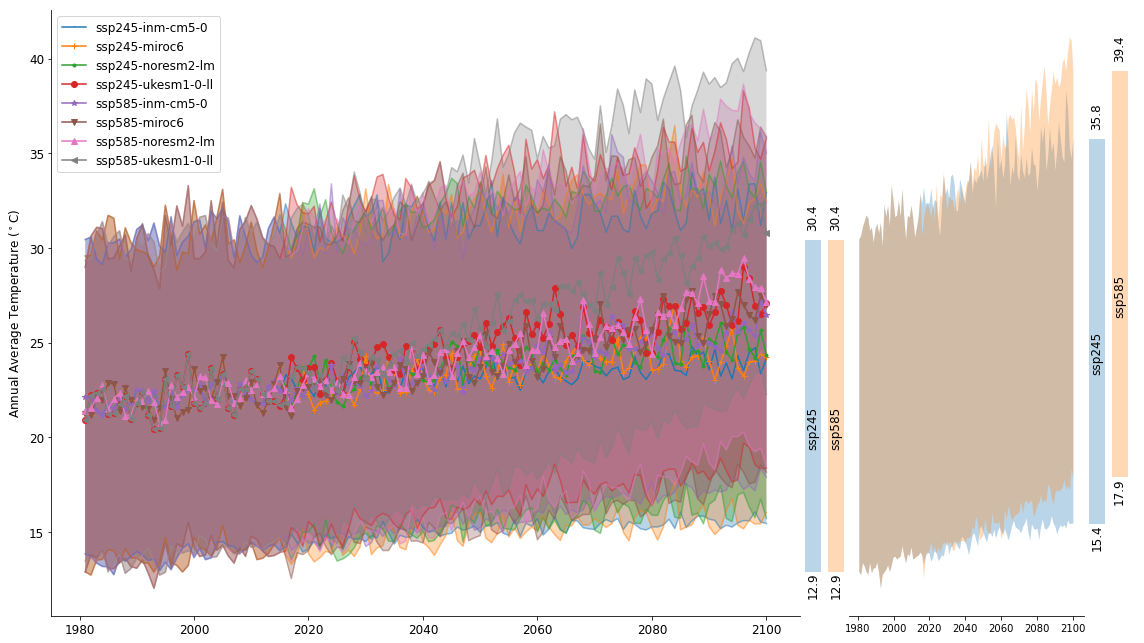

In [237]:
f, axes = plt.subplots(
    1, 4, figsize=(16, 9), sharey=True,
    gridspec_kw={
                'width_ratios': [0.7, 0.04, 0.22, 0.04],
                'wspace': 0.01
                })

ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

axes[1].tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axes[1].axis('off')

# axes[1].axis('off')
axes[3].tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axes[3].axis('off')

ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i in range(len(adf_mean.columns)):
    axes[0].plot(adf_mean.index, adf_mean.iloc[:, i], marker = next(marker), label=adf_mean.columns[i])
    axes[0].plot(adf_mean.index, adf_min.iloc[:, i], color=colors[i], alpha=0.5)
    axes[0].fill_between(adf_mean.index, adf_min.iloc[:, i], adf_max.iloc[:, i], alpha=0.3)
    axes[0].plot(adf_mean.index, adf_max.iloc[:, i], color=colors[i], alpha=0.5)
    # ax.fill_between(scn_df.index, s585_min, s585_max, alpha=0.3, label='ssp585')

axes[2].fill_between(adf_mean.index, t245_min, t245_max, alpha=0.3, label='ssp245 ')
axes[2].fill_between(adf_mean.index, t585_min, t585_max, alpha=0.3, label='ssp585')


axes[1].bar(
    0, t245_max['1980-12-31']-t245_min['1980-12-31'],
    width=0.7,
    bottom=t245_min['1980-12-31'], alpha=0.3)
axes[1].bar(
    1, t585_max['1980-12-31']-t585_min['1980-12-31'],
    width=0.7,
    bottom=t585_min['1980-12-31'], alpha=0.3)

axes[1].text(
    0, (t245_max['1980-12-31'] + t245_min['1980-12-31'])/2,
   'ssp245',
    rotation=90,
    va='top',
    ha='center',
    fontsize=12)
axes[1].text(
    1, (t585_min['1980-12-31']+t585_max['1980-12-31'])/2,
    'ssp585',
    rotation=90,
    va='top',
    ha='center',
    fontsize=12
    )

axes[1].text(
    0, t245_min['1980-12-31'],
    '{:.1f}'.format(t245_min['1980-12-31']),
    rotation=90,
    va='top',
    ha='center',
    fontsize=12)

axes[1].text(
    1, t585_min['1980-12-31'],
    '{:.1f}'.format(t585_min['1980-12-31']),    
    rotation=90,
    va='top',
    ha='center',
    fontsize=12
    )

axes[1].text(
    0, t245_max['1980-12-31']+0.5,
    '{:.1f}'.format(t245_max['1980-12-31']),
    rotation=90,
    va='bottom',
    ha='center',
    fontsize=12)

axes[1].text(
    1, t585_max['1980-12-31']+0.5,
    '{:.1f}'.format(t585_max['1980-12-31']),    
    rotation=90,
    va='bottom',
    ha='center',
    fontsize=12
    )

axes[3].bar(
    0, t245_max['2099-12-31']-t245_min['2099-12-31'],
    width=0.7,
    bottom=t245_min['2099-12-31'], alpha=0.3)
axes[3].bar(
    1, t585_max['2099-12-31']-t585_min['2099-12-31'],
    width=0.7,
    bottom=t585_min['2099-12-31'], alpha=0.3)

# ax1.add_patch(Rectangle((1.01, 0.2), 0.01, 0.95))

axes[0].tick_params(axis='both', labelsize=12)
axes[0].legend(loc='upper left', fontsize=12,)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

axes[2].spines['left'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].tick_params(top=False, left=False, right=False)

# axes[1].tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

axes[3].text(
    0, (t245_min['2099-12-31']+t245_max['2099-12-31'])/2,
    'ssp245', rotation=90,
    va='top',
    ha='center',
    fontsize=12)
axes[3].text(
    1, (t585_min['2099-12-31']+t585_max['2099-12-31'])/2,
    'ssp585', rotation=90,
    va='top',
    ha='center',
    fontsize=12
    )

axes[3].text(
    0, t245_min['2099-12-31'],
    '{:.1f}'.format(t245_min['2099-12-31']),
    rotation=90,
    va='top',
    ha='center',
    fontsize=12)
axes[3].text(
    0, t245_max['2099-12-31']+0.5,
    '{:.1f}'.format(t245_max['2099-12-31']),
    rotation=90,
    va='bottom',
    ha='center',
    fontsize=12)

axes[3].text(
    1, t585_min['2099-12-31'],
    '{:.1f}'.format(t585_min['2099-12-31']),
    rotation=90,
    va='top',
    ha='center',
    fontsize=12)

axes[3].text(
    1, t585_max['2099-12-31']+0.5,
    '{:.1f}'.format(t585_max['2099-12-31']),
    rotation=90,
    va='bottom',
    ha='center',
    fontsize=12)


ax1.set_ylabel('Annual Average Temperature ($^\circ$C)', fontsize=12)
# axes[1].legend()
# ax.set_yscale('log')
f.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_scn_tmp.png'), dpi=300, bbox_inches="tight")
plt.show()
# ax.plot(base_df.index, base_df, label='BASE')

In [71]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [ ]:


tot_df

#%%
abase_df = base_dff.resample('A').sum()
adf =dff.resample('A').sum()
atot_df = pd.concat([abase_df, adf], axis=1)
atot_df

#%% get month plot 
mon_df = tot_df.groupby(tot_df.index.month).mean()
mon_df

#%% get min max
gcsms_mon = mon_df.iloc[:, 1:]
s245_min = gcsms_mon.iloc[:, :4].min(axis = 1)
s245_max = gcsms_mon.iloc[:, :4].max(axis = 1)
s585_min = gcsms_mon.iloc[:, 4:].min(axis = 1)
s585_max = gcsms_mon.iloc[:, 4:].max(axis = 1)



#%% plot month
# 
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',)) 

f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axes[1].plot(mon_df.index, mon_df['base'], label='base')
# ax.fill_between(base_dff.index, 0, base_dff.sub_137, alpha=0.3)
axes[1].fill_between(mon_df.index, s245_min, s245_max, alpha=0.3, label='ssp245 ')
axes[1].fill_between(mon_df.index, s585_min, s585_max, alpha=0.3, label='ssp585')

# axes[0].plot(mon_df.index, mon_df, marker=[',', '+', '.', 'o', '*'])
for i in range(len(mon_df.columns)):
    axes[0].plot(mon_df.index, mon_df.iloc[:, i], marker = next(marker))
axes[0].legend(mon_df.columns.tolist())
axes[1].legend()
# month_names = ['Jan','Feb','Mar','Apr','May','Jun',
#                'Jul','Aug','Sep','Oct','Nov','Dec']
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
for ax in axes:
    ax.set_xticklabels(month_names, rotation=90)
    ax.set_xticks(mon_df.index[::1])
ax1.set_ylabel('Monthly Rainfall Intensity $[mm/month]$')
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_mon.png'), dpi=300, bbox_inches="tight")
plt.show()

#%%
# Boxplot
f, axes = plt.subplots(3, 4, figsize=(12,8), sharex=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']


# plot. Set color of marker edge
flierprops = dict(
                marker='o', markerfacecolor='#1f77b4', markersize=7,
                # linestyle='None',
                # markeredgecolor='none',
                alpha=0.3)
for i, ax in enumerate(axes.flat):
    df_m = tot_df.loc[tot_df.index.month==i+1]
    ax.boxplot(df_m.values, flierprops=flierprops)
    ax.set_xticks([i+1 for i in range(9)])
    ax.set_xticklabels(df_m.keys(), rotation=90)
    # ax.set_xticks(df_m.columns[::1])
    ax.set_title(
        month_names[i],
        horizontalalignment='left',
        x=0.02,
        y=0.85,
        )
ax1.set_ylabel('Monthly Rainfall Intensity $[mm/month]$')
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_mon2.png'), dpi=300, bbox_inches="tight")
plt.show()

#%% get min max
agcm = atot_df.iloc[:, 1:]
s245_min = agcm.iloc[:, :4].min(axis = 1)
s245_max = agcm.iloc[:, :4].max(axis = 1)
s585_min = agcm.iloc[:, 4:].min(axis = 1)
s585_max = agcm.iloc[:, 4:].max(axis = 1)


ctot_df = atot_df['1/1/2000':'12/31/2019']

#%% plot month
# 
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',)) 

f, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axes[1].plot(atot_df.index, atot_df['base'], label='base')
# ax.fill_between(base_dff.index, 0, base_dff.sub_137, alpha=0.3)
axes[1].fill_between(atot_df.index, s245_min, s245_max, alpha=0.3, label='ssp245')
axes[1].fill_between(atot_df.index, s585_min, s585_max, alpha=0.3, label='ssp585')

# axes[0].plot(mon_df.index, mon_df, marker=[',', '+', '.', 'o', '*'])
for i in range(len(ctot_df.columns)):
    axes[0].plot(ctot_df.index, ctot_df.iloc[:, i], marker = next(marker))
axes[0].legend(atot_df.columns.tolist(), ncol=2)
axes[1].legend()

month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
axes[0].margins( y=0.2)
ax1.set_ylabel('Annual Rainfall Intensity $[mm/year]$', labelpad=10)
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_a.png'), dpi=300, bbox_inches="tight")
plt.show()


In [71]:
from swatmf_pkgs import swatmf_viz
import itertools